# Purchasing Intention Prediction

In this project, I'll explore the `Online Shoppers Purchasing Intention Dataset` available [here](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#). The aim of this project is to understand the data and predict whether a visitor will make a purchase or not.

## Import libraries

The first step is to import the necessary libraries I'll use in this project. For working with the Artificial Neural Network, I'll use Keras with Tensorflow backend.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

Using TensorFlow backend.


## Import dataset

Next step is to import the dataset and get basic information from it.

In [2]:
dataset = pd.read_csv('data/dataset.csv')

In [3]:
dataset.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2926,0,0.0,0,0.0,3,27.000000,0.066667,0.100000,0.0,0.6,May,2,2,1,3,Returning_Visitor,False,False
11941,3,17.0,0,0.0,62,1493.353846,0.009524,0.040317,0.0,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
10278,0,0.0,0,0.0,35,586.375000,0.018286,0.053714,0.0,0.0,Nov,2,4,1,3,Returning_Visitor,False,False
6109,1,45.4,0,0.0,60,2580.634935,0.000000,0.009443,0.0,0.0,Oct,1,1,1,2,Returning_Visitor,False,False
96,0,0.0,0,0.0,6,1566.500000,0.050000,0.066667,0.0,0.2,Feb,1,1,1,3,Returning_Visitor,False,False


Let's see if there are any null values.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

Seems like all cells are filled and there are no missing values. Also, the time spent on a certain type of page owuld generally correlate with the number of that type of pages visited. Hence, I'll drop the number of each type of page visited and just keep the duration columns. I'll also check the description of the columns to understand the range of each column.

In [5]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


The `mean` of each column is very varied from one another and hence scaling should help with it. Considering that `Revenue` is the target column, I'll split the dataset into test and train sets.

In [6]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.reset_index(inplace = True)
X_test.reset_index(inplace = True)

## Data analysis and visualization

Let's take a deep dive and try to understand the dataset through visualizations.

### Target column

The first step is to take a look at the distribution of the data between the two classes.

Text(0.5, 1.0, 'Count of visitors based on revenue generated')

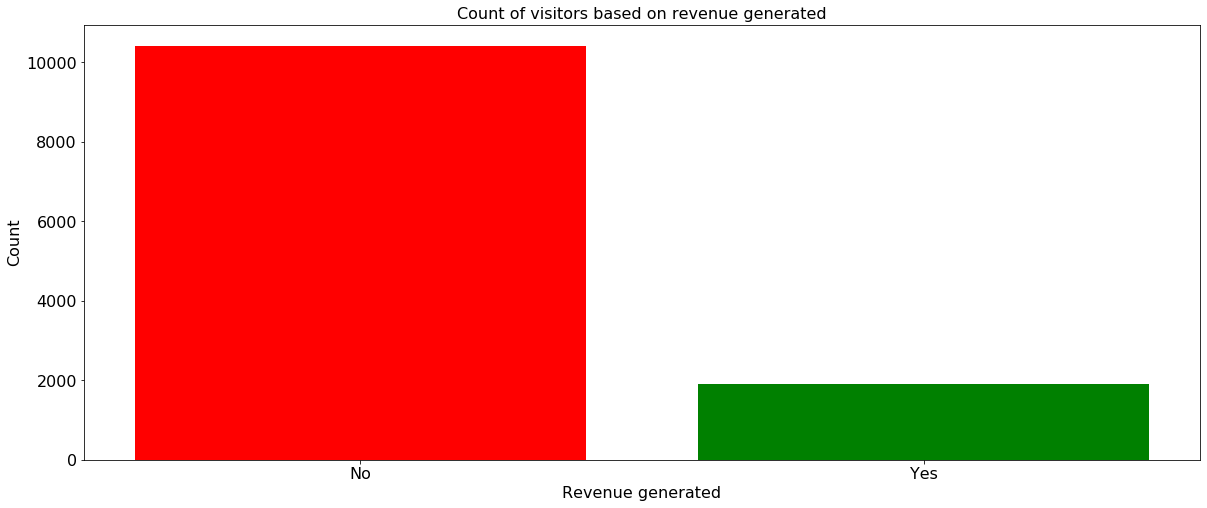

In [7]:
target_distribution = y.value_counts()

plt.figure(figsize = (20, 8))
plt.bar(target_distribution.keys().tolist(), target_distribution.tolist(), color = ['red', 'green'])

plt.xlabel('Revenue generated', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks([0.0, 1.0], ['No', 'Yes'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Count of visitors based on revenue generated', fontsize = 16)

As is clear from the bar plot above, the dataset includes majority of feature values that resulted in no revenue generation. The dataset is highly unbalanced and this is where we'd have to create an efficient model that can still classify between the two classes.

### Correlation matrix

I'll directly analyse the matrix rather than using a plotting library to create a correlation plot. However, to quickly analyse the output, I'll use the `coolwarm` cmap.

In [8]:
corr = dataset.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1,0.601583,0.37685,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.0989896,-0.0947776,-0.00634706,-0.0250346,-0.00548681,-0.0335607,0.0264168,0.138917
Administrative_Duration,0.601583,1,0.30271,0.238031,0.289087,0.355422,-0.14417,-0.205798,0.0676085,-0.0733037,-0.00734342,-0.0153915,-0.00556056,-0.0143764,0.0149901,0.0935867
Informational,0.37685,0.30271,1,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.0486317,-0.0482193,-0.00952667,-0.0382347,-0.0291686,-0.0344908,0.0357847,0.0952003
Informational_Duration,0.255848,0.238031,0.618955,1,0.280046,0.347364,-0.0740666,-0.105276,0.0308609,-0.0305765,-0.00957868,-0.019285,-0.0271441,-0.0246749,0.0240785,0.0703445
ProductRelated,0.431119,0.289087,0.374164,0.280046,1,0.860927,-0.204578,-0.292526,0.0562818,-0.0239582,0.00428962,-0.0131457,-0.0381218,-0.0430643,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1,-0.184541,-0.251984,0.0528231,-0.0363798,0.00297579,-0.00738044,-0.0330905,-0.0363772,0.00731061,0.152373
BounceRates,-0.223563,-0.14417,-0.116114,-0.0740666,-0.204578,-0.184541,1,0.913004,-0.119386,0.0727023,0.0238232,-0.0157722,-0.00648535,0.0782855,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1,-0.174498,0.102242,0.0145667,-0.00444236,-0.00890701,0.0786163,-0.062587,-0.207071
PageValues,0.0989896,0.0676085,0.0486317,0.0308609,0.0562818,0.0528231,-0.119386,-0.174498,1,-0.0635413,0.0185079,0.0455919,0.0113153,0.0125317,0.0120016,0.492569
SpecialDay,-0.0947776,-0.0733037,-0.0482193,-0.0305765,-0.0239582,-0.0363798,0.0727023,0.102242,-0.0635413,1,0.0126522,0.00349875,-0.016098,0.0523014,-0.0167672,-0.0823046


It appears that `PageValues` is the most linearly correlated with our target value. Also, features such as `OperatingSystems`, `Region` and `TrafficType` have correlation less than `0.02`, so I'll drop these columns.

The relation between `Administrative` and `Administrative_Duration`, `Informational` and `Informational_Duration` and `ProductRelated` and `ProductRelated_Duration` appear to have very high correlation as can be seen in the correlation matrix. This is expected as the duration spent on a type of page would surely be influenced by the number of that type of page visited. Thus, we can remove the number of pages visited of each type.

## Data engineering

I'll remove redundant columns, and update existing columns.

### Remove columns

I'll remove columns that appear to be redundant and provide no useful information towards the target class. I'll begin by dropping the count of each page visited.

In [9]:
X_train = X_train.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)
X_test = X_test.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)

I'll also removee columns that have less than 0.02 and more than -0.02 correlation with target values.

In [10]:
X_train.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)
X_test.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)

### Encoding categorical columns

Next, I'll use `LabelEncoder` and `OneHotEncoder` on categorical columns.

In [11]:
labelEncoder = LabelEncoder()
X_train.loc[:, 'Month'] = labelEncoder.fit_transform(X_train.loc[:, 'Month'])
X_test.loc[:, 'Month'] = labelEncoder.transform(X_test.loc[:, 'Month'])
X_train.loc[:, 'VisitorType'] = labelEncoder.fit_transform(X_train.loc[:, 'VisitorType'])
X_test.loc[:, 'VisitorType'] = labelEncoder.transform(X_test.loc[:, 'VisitorType'])
X_train.loc[:, 'Weekend'] = labelEncoder.fit_transform(X_train.loc[:, 'Weekend'])
X_test.loc[:, 'Weekend'] = labelEncoder.transform(X_test.loc[:, 'Weekend'])

Once the labels are encoded, I'll use `OneHotEncoder` to create separate columns for each class in the columns, drop the first column for each class and append the new columns to train and test data, once the original columns are removed.

In [12]:
onehotencoder = OneHotEncoder(categories = 'auto', drop = 'first')
train_cat_features = onehotencoder.fit_transform(X_train.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
train_cat_features = pd.DataFrame(train_cat_features)
test_cat_features = onehotencoder.transform(X_test.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
test_cat_features = pd.DataFrame(test_cat_features)

X_train.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_train = X_train.join(train_cat_features)
X_test.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_test = X_test.join(test_cat_features)

### Scaling the data

After removing some columns, I'll now scale the columns to have mean 0.

In [13]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

## Model generation

I'll create the Artificial Neural Network now. I'll create network with many layers. I've developed this architecture based on hit and trial and the validation accuracy I got.

In [14]:
classifier = Sequential()
classifier.add(Dense(units = 128, activation = 'relu', input_dim = 32))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.4))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_____________________________________

## Training and evaluating the model

I'll now train the model with the train data and the validation data as 10% of the train data.

In [15]:
history = classifier.fit(X_train, y_train, epochs = 50, shuffle = False, validation_split = 0.1)

Train on 8877 samples, validate on 987 samples
Epoch 1/50
8877/8877 [==============================] - 6s 712us/step - loss: 0.4268 - acc: 0.8497 - val_loss: 0.3264 - val_acc: 0.8744
Epoch 2/50
8877/8877 [==============================] - 2s 172us/step - loss: 0.3372 - acc: 0.8670 - val_loss: 0.2963 - val_acc: 0.8804
Epoch 3/50
8877/8877 [==============================] - 2s 169us/step - loss: 0.3130 - acc: 0.8782 - val_loss: 0.2923 - val_acc: 0.8835
Epoch 4/50
8877/8877 [==============================] - 2s 170us/step - loss: 0.2983 - acc: 0.8857 - val_loss: 0.2824 - val_acc: 0.8825
Epoch 5/50
8877/8877 [==============================] - 2s 172us/step - loss: 0.2900 - acc: 0.8899 - val_loss: 0.2732 - val_acc: 0.8815
Epoch 6/50
8877/8877 [==============================] - 2s 170us/step - loss: 0.2866 - acc: 0.8894 - val_loss: 0.2634 - val_acc: 0.8865
Epoch 7/50
8877/8877 [==============================] - 2s 171us/step - loss: 0.2746 - acc: 0.8905 - val_loss: 0.2641 - val_acc: 0.8865
E

I'll output the prediction on the test data and evaluate the `Confusion Matrix` and `Accuracy`.

Accuracy: 89.01%


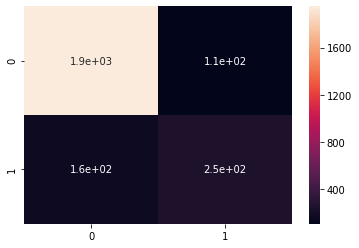

In [16]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

conf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns

sns.heatmap(conf_matrix, annot=True)

## Result analysis

The confusion matrix reveals that we are able to identify both type of visitors, visitors that are going to generate revenue and visitors that are not going to. We can use this information as follows:
1. Once we are able to identify that someone is going to generate revenue, we do not need to provide any coupons, rather we can give the visitors special points which they can use the next time they visit.
2. The visitors that are unlikely to make a purchase can be provided with discount coupons so that they are more likely to make a purchase.